In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('top_200_weekly.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


In [3]:
df.nunique()

Position        200
Track Name     4077
Artist          956
Streams       52062
URL            4918
Week Start      261
Week End        261
ID             4918
URI            4918
dtype: int64

In [4]:
df_audio = pd.read_csv("song_features.csv")
df_audio.head()

,track_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,5aAx2yezTd8zXrkmtKl66Z,0.594,0.134,186.054,0.2820,0.1650,0.000003,0.681,7,230453,-7.028,1,0.5350
1,7BKLCZ1jbUBVqRi2FVlTVw,0.524,0.111,95.010,0.0338,0.4140,0.000000,0.748,8,244960,-5.599,1,0.6610
2,5knuzwU65gJK7IF5yJsuaW,0.763,0.180,101.965,0.0523,0.4060,0.000000,0.720,9,251088,-4.068,0,0.7420
3,4pdPtRcBmOSQDlJ3Fk945m,0.718,0.122,199.864,0.0576,0.0784,0.000010,0.476,8,205947,-5.309,1,0.1420
4,3NdDpSvN911VPGivFlV5d0,0.451,0.325,117.973,0.0585,0.0631,0.000013,0.735,0,245200,-8.374,1,0.0862


In [5]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4918 non-null   object 
 1   energy            4918 non-null   float64
 2   liveness          4918 non-null   float64
 3   tempo             4918 non-null   float64
 4   speechiness       4918 non-null   float64
 5   acousticness      4918 non-null   float64
 6   instrumentalness  4918 non-null   float64
 7   danceability      4918 non-null   float64
 8   key               4918 non-null   int64  
 9   duration_ms       4918 non-null   int64  
 10  loudness          4918 non-null   float64
 11  mode              4918 non-null   int64  
 12  valence           4918 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 499.6+ KB


In [6]:
df_audio.rename(columns={"track_id":'ID'},inplace=True)

In [7]:
df_merge = pd.merge(df,df_audio,on="ID")

In [8]:
df_merge.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI,energy,...,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.594,...,186.054,0.282,0.165,0.000003,0.681,7,230453,-7.028,1,0.535
1,3,Starboy,The Weeknd,24261229,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,2017-01-13,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.594,...,186.054,0.282,0.165,0.000003,0.681,7,230453,-7.028,1,0.535
2,4,Starboy,The Weeknd,24480907,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-13,2017-01-20,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.594,...,186.054,0.282,0.165,0.000003,0.681,7,230453,-7.028,1,0.535
3,5,Starboy,The Weeknd,22925769,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-20,2017-01-27,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.594,...,186.054,0.282,0.165,0.000003,0.681,7,230453,-7.028,1,0.535
4,7,Starboy,The Weeknd,20295877,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-27,2017-02-03,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.594,...,186.054,0.282,0.165,0.000003,0.681,7,230453,-7.028,1,0.535


In [9]:
df_merge.loc[:,'Year'] = pd.Series(map(lambda x:int(x[:4]) ,df['Week End']))
df_merge.loc[:,'Month'] = pd.Series(map(lambda x:int(x[5:7]) ,df['Week End']))
df_merge.loc[:,'Year_Month'] = pd.Series(map(lambda x: x[:7] ,df['Week End']))

In [10]:
def season(m):
    if (m==12) or (m==1) or (m==2):
        return "Winter"
    elif (m==3) or (m==4) or (m==5):
        return "Spring"
    elif (m==6) or (m==7) or (m==8):
        return "Summer"
    else:
        return "Autumn"

In [11]:
df_merge.loc[:,'Season'] = pd.Series(map(season ,df_merge['Month']))

In [12]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52200 entries, 0 to 52199
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          52200 non-null  int64  
 1   Track Name        52193 non-null  object 
 2   Artist            52193 non-null  object 
 3   Streams           52200 non-null  int64  
 4   URL               52200 non-null  object 
 5   Week Start        52200 non-null  object 
 6   Week End          52200 non-null  object 
 7   ID                52200 non-null  object 
 8   URI               52200 non-null  object 
 9   energy            52200 non-null  float64
 10  liveness          52200 non-null  float64
 11  tempo             52200 non-null  float64
 12  speechiness       52200 non-null  float64
 13  acousticness      52200 non-null  float64
 14  instrumentalness  52200 non-null  float64
 15  danceability      52200 non-null  float64
 16  key               52200 non-null  int64 

In [13]:
audio_features = df_audio.columns[1:]
audio_features1 = ['energy', 'liveness', 'tempo', 'speechiness', 'acousticness']
audio_features2 = ['danceability', 'key', 'duration_ms', 'loudness', 'valence']

## Q2. What is the temporal trend of the audio features?

### (1) Season

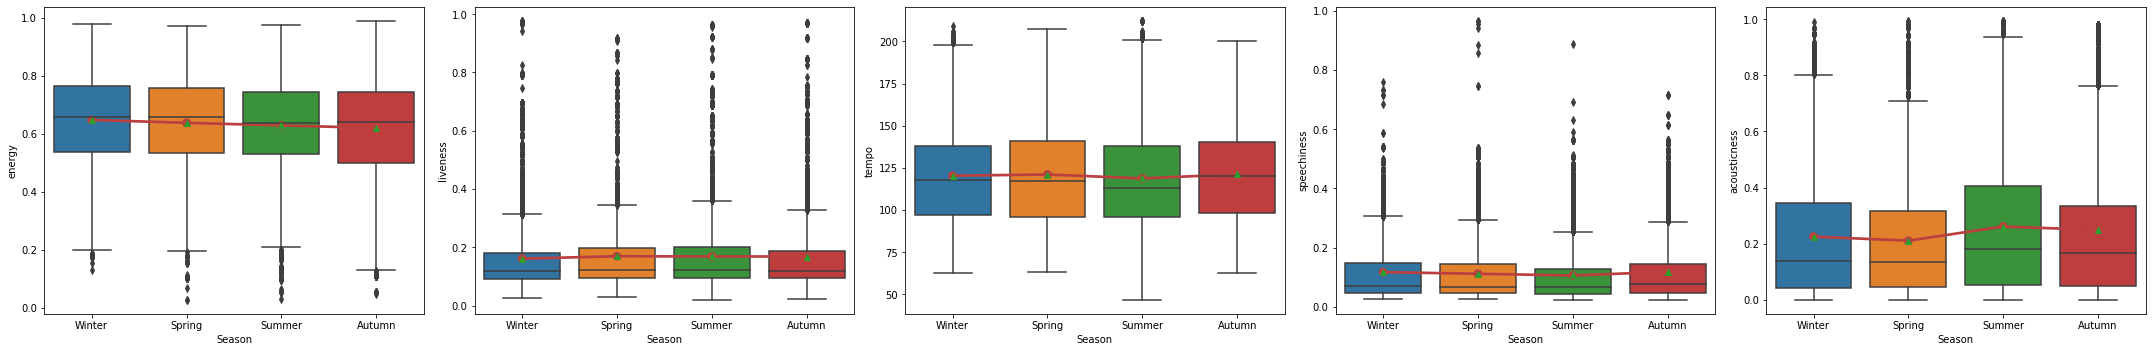

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features1):
    
    sns.boxplot(x="Season", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Season", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_season1.png",dpi=300)
plt.show()

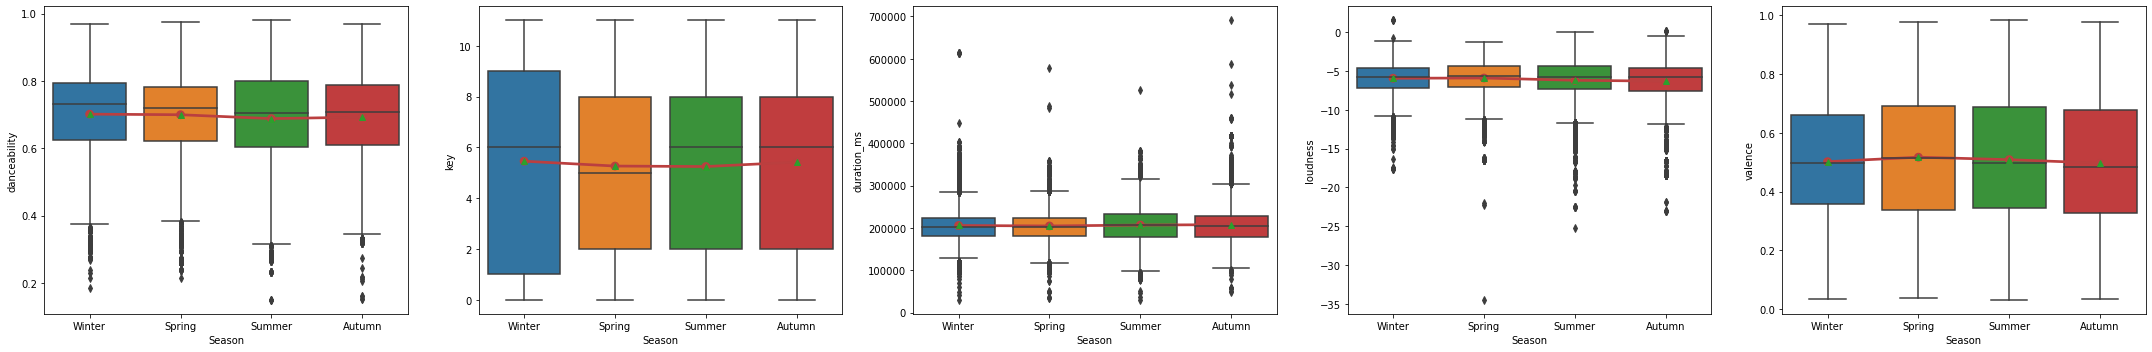

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features2):
    
    sns.boxplot(x="Season", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Season", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_season2.png",dpi=300)
plt.show()

### (2) Month

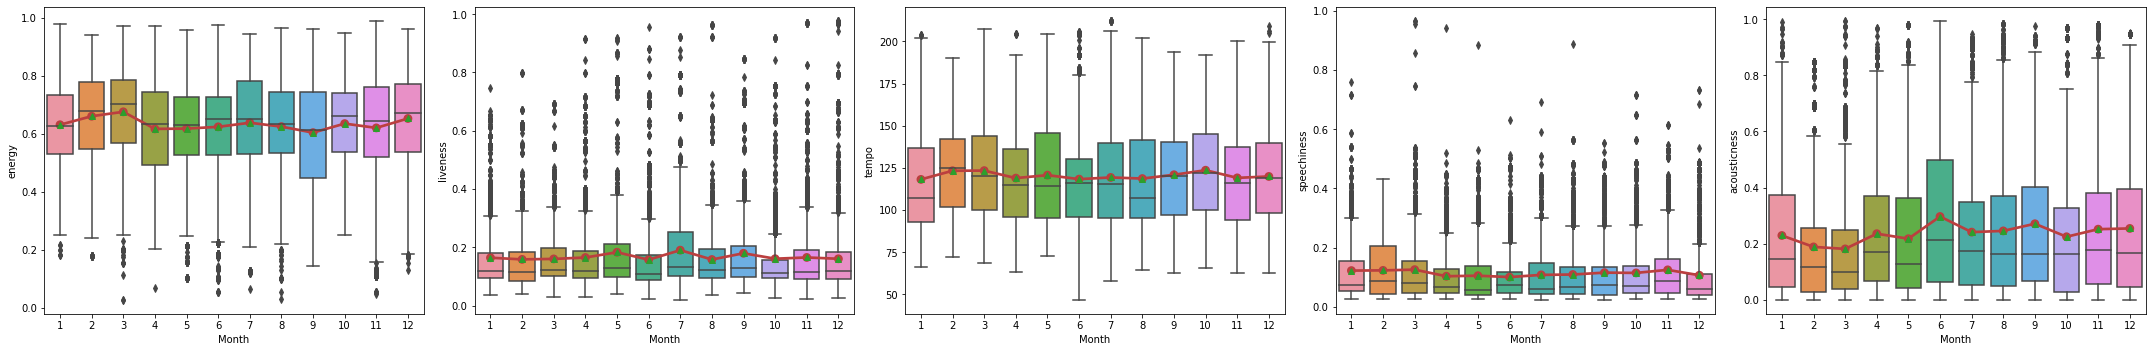

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features1):
    
    sns.boxplot(x="Month", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Month", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_month1.png",dpi=300)
plt.show()

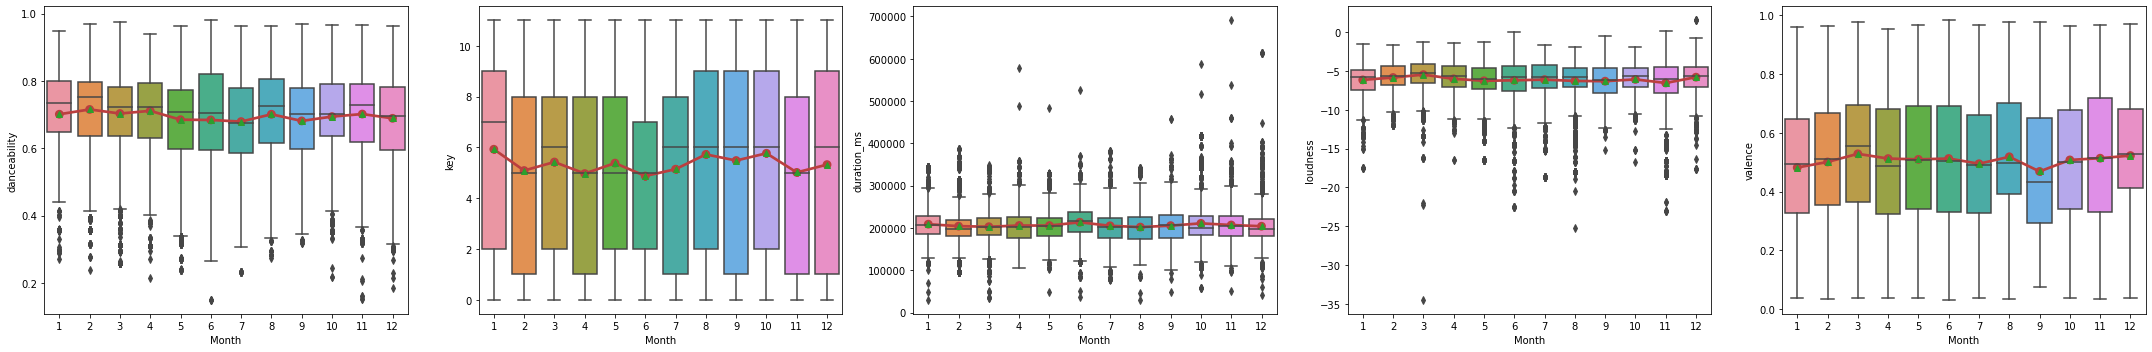

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features2):
    
    sns.boxplot(x="Month", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Month", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_month2.png",dpi=300)
plt.show()

### (3) Year

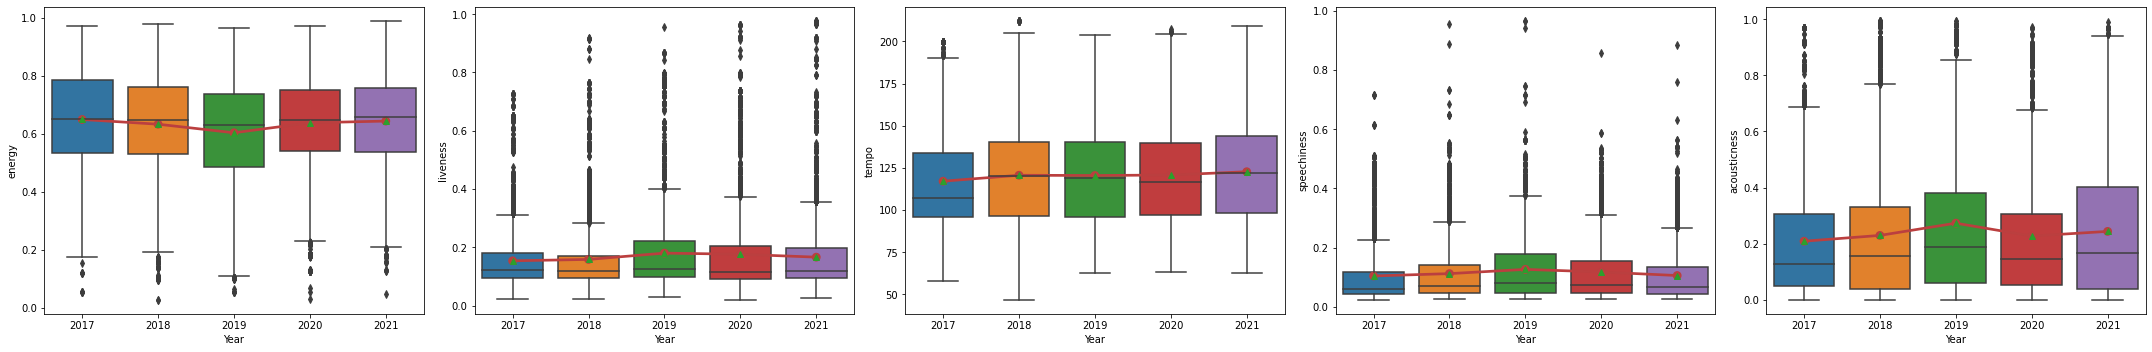

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features1):
    
    sns.boxplot(x="Year", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Year", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_year1.png",dpi=300)
plt.show()

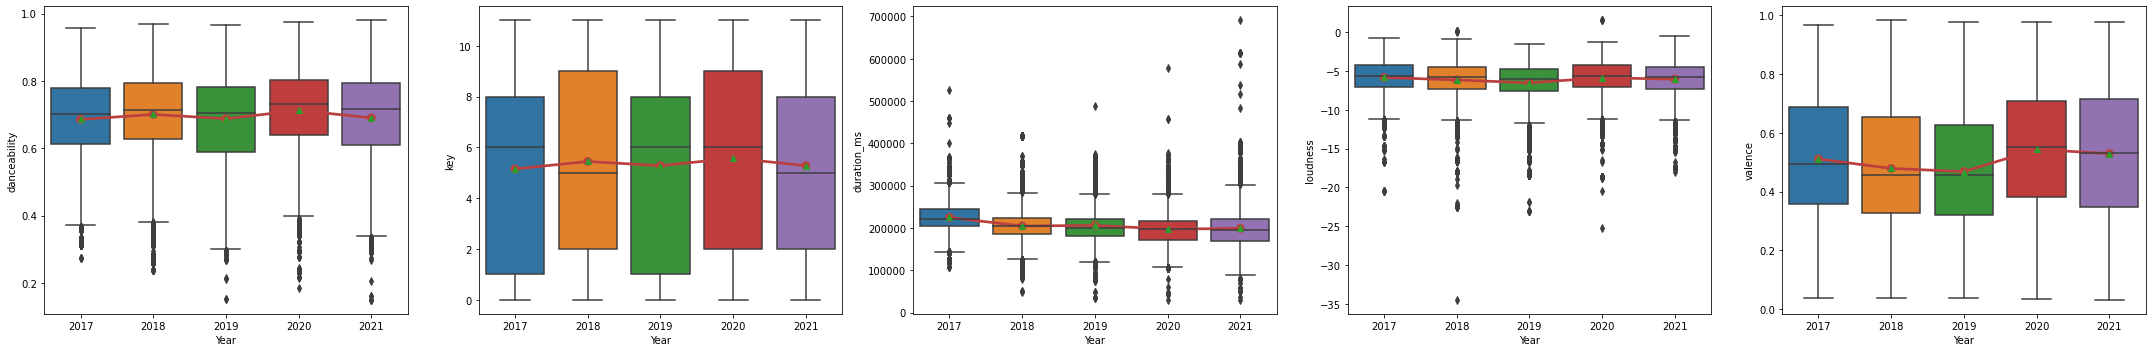

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,a in enumerate(audio_features2):
    
    sns.boxplot(x="Year", y=a,data=df_merge,showmeans=True,ax=axes[i])
    sns.pointplot(x="Year", y=a,data=df_merge,showmeans=True,color="#bb3f3f",ax=axes[i])
    # plt.xticks(rotation=90)
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.title('Best rank vs Number of weeks stayes')
    # plt.xlabel('Number of weeks stayes')
    # plt.ylabel('Streams')
plt.tight_layout()
plt.savefig(f"figures/audio_year2.png",dpi=300)
plt.show()